## Цели и задачи проекта

На основе имеющихся данных отследить влияние условий жизни учащихся в возрасте от 15 до 22 лет на их успеваемость по математике, чтобы на ранней стадии выявлять студентов, находящихся в группе риска.

## Анализ

In [437]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

pd.set_option('display.max_rows', 50) # показывать больше строк
pd.set_option('display.max_columns', 50) # показывать больше колонок

students = pd.read_csv('stud_math.csv')

In [438]:
# Вспомогательная функция для определения статистически значимый разлиций по тесту Стьюдента
def get_stat_dif(column):
    cols = students.loc[:, column].value_counts().index[:10]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(students.loc[students.loc[:, column] == comb[0], 'score'], 
                     students.loc[students.loc[:, column] == comb[1], 'score']).pvalue \
            <= 0.05/len(combinations_all): # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

In [439]:
# Вспомогательная функция отображения box_plot
def get_boxplot(column):
    fig, ax = plt.subplots(figsize = (10, 4))
    sns.boxplot(x=column, y='score', 
                data=students.loc[students.loc[:, column].isin(students.loc[:, column].value_counts().index[:10])],
               ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

In [440]:
def show_base_info(column):
    display(pd.DataFrame(students[column].value_counts()))
    students.loc[:, [column]].info()
    print('Количество пустых значений:', students[column].isnull().sum())

In [441]:
# Визуальная оценка сырых данных
display(students.head(10))
students.info() 

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

In [442]:
# Переименуем отдельные столбцы для удобства
students.rename(columns= {'studytime, granular': 'studytime_granular'}, inplace=True)
students.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   school              395 non-null    object 
 1   sex                 395 non-null    object 
 2   age                 395 non-null    int64  
 3   address             378 non-null    object 
 4   famsize             368 non-null    object 
 5   Pstatus             350 non-null    object 
 6   Medu                392 non-null    float64
 7   Fedu                371 non-null    float64
 8   Mjob                376 non-null    object 
 9   Fjob                359 non-null    object 
 10  reason              378 non-null    object 
 11  guardian            364 non-null    object 
 12  traveltime          367 non-null    float64
 13  studytime           388 non-null    float64
 14  failures            373 non-null    float64
 15  schoolsup           386 non-null    object 
 16  famsup  

## Очистка данных

### School

In [443]:
show_base_info('school')

,school
GP,349
MS,46


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   school  395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB
Количество пустых значений: 0


Колонка school не содержит пропусков и выбросов. В дополнительной обработке не нуждается

### Sex

In [444]:
show_base_info('sex')

,sex
F,208
M,187


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   sex     395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB
Количество пустых значений: 0


Колонка sex не содержит пропусков или выбросов. В дополнительной обработке не нуждается.

### Age

In [445]:
show_base_info('age')

,age
16,104
17,98
18,82
15,82
19,24
20,3
22,1
21,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   age     395 non-null    int64
dtypes: int64(1)
memory usage: 3.2 KB
Количество пустых значений: 0


count    395.000000
mean      16.696203
std        1.276043
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

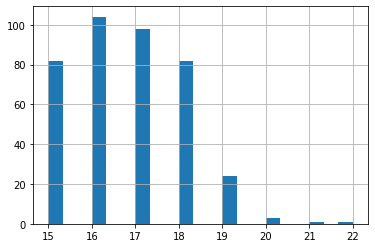

In [446]:
students.age.hist(bins=21)
students.age.describe()

Колонка "возраст" не содержит пропусков, значения укладываются в рамки здравого смысла. Однако, записей с возраста 20+ мало, попробуем их проверить на принадлежность к выбросам с помощью IQR

In [447]:
p25 = students.age.quantile(.25)
p75 = students.age.quantile(.75)
iqr = p75 - p25

print('25-й перцентиль: {},'.format(p25), '75-й перцентиль: {},'.format(p75), "IQR: {}, ".format(iqr), 
      "Границы выбросов: [{f}, {l}].".format(f=p25 - 1.5*iqr, l=p75 + 1.5*iqr))

25-й перцентиль: 16.0, 75-й перцентиль: 18.0, IQR: 2.0,  Границы выбросов: [13.0, 21.0].


Граница выбросов справа имеет значение 21. Отфильтруем выборку по границам IQR

count    394.000000
mean      16.682741
std        1.249267
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       21.000000
Name: age, dtype: float64

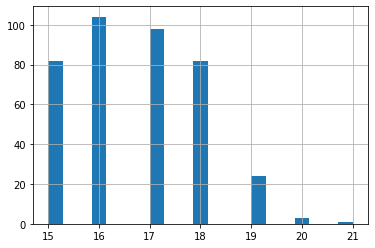

In [448]:
# Избавляемся от выбросов
students = students.loc[(students.age.between(p25 - 1.5*iqr, p75 + 1.5*iqr))]
students.age.hist(bins=21)
students.age.describe()

### Address

In [449]:
show_base_info('address')

,address
U,294
R,83


<class 'pandas.core.frame.DataFrame'>
Int64Index: 394 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   address  377 non-null    object
dtypes: object(1)
memory usage: 6.2+ KB
Количество пустых значений: 17


Колонка адреса содержит пропуски, однако они представлены в виде NaN и не требуют дополнительной обработки

### Famsize

In [450]:
show_base_info('famsize')

,famsize
GT3,260
LE3,107


<class 'pandas.core.frame.DataFrame'>
Int64Index: 394 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   famsize  367 non-null    object
dtypes: object(1)
memory usage: 6.2+ KB
Количество пустых значений: 27


Колонка "размер семьи" содержит пропуски, однако они уже представлены в виде NaN и не требуют дополнительной обработки

### Pstatus

In [451]:
show_base_info('Pstatus')

,Pstatus
T,313
A,36


<class 'pandas.core.frame.DataFrame'>
Int64Index: 394 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Pstatus  349 non-null    object
dtypes: object(1)
memory usage: 6.2+ KB
Количество пустых значений: 45


Выбросов не обнаружено, колонкасодержит пропуски, однако они уже представлены в виде NaN и не требуют дополнительной обработки

### Medu 

In [452]:
show_base_info('Medu')

,Medu
4.0,131
2.0,102
3.0,96
1.0,59
0.0,3


<class 'pandas.core.frame.DataFrame'>
Int64Index: 394 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Medu    391 non-null    float64
dtypes: float64(1)
memory usage: 6.2 KB
Количество пустых значений: 3


Выбросов не обнаружено, колонка содержит пропуски, однако они уже представлены в виде NaN и не требуют дополнительной обработки

### Fedu

In [453]:
show_base_info('Fedu')

,Fedu
2.0,106
3.0,96
4.0,88
1.0,77
0.0,2
40.0,1


<class 'pandas.core.frame.DataFrame'>
Int64Index: 394 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Fedu    370 non-null    float64
dtypes: float64(1)
memory usage: 6.2 KB
Количество пустых значений: 24


Обнаружен 1 выброс (значение 40), пропуски не требуют дополнительной обработки

In [454]:
# Исключаем все записи, выходящие за пределы диапазона [0, 4], но при этом оставляем пропуски чтобы не потерять потенциально
# существенные данные для определения корреляции параметров

students = students.loc[(students.Fedu.between(0, 4)) | students.Fedu.isnull()]

In [455]:
show_base_info('Fedu')

,Fedu
2.0,106
3.0,96
4.0,88
1.0,77
0.0,2


<class 'pandas.core.frame.DataFrame'>
Int64Index: 393 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Fedu    369 non-null    float64
dtypes: float64(1)
memory usage: 6.1 KB
Количество пустых значений: 24


### Mjob 

In [456]:
show_base_info('Mjob')

,Mjob
other,133
services,96
at_home,58
teacher,55
health,32


<class 'pandas.core.frame.DataFrame'>
Int64Index: 393 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Mjob    374 non-null    object
dtypes: object(1)
memory usage: 6.1+ KB
Количество пустых значений: 19


Выбросов не обнаружено, пропуски не требуют дополнительной обработки

### Fjob 

In [457]:
show_base_info('Fjob')

,Fjob
other,196
services,101
teacher,29
at_home,16
health,15


<class 'pandas.core.frame.DataFrame'>
Int64Index: 393 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Fjob    357 non-null    object
dtypes: object(1)
memory usage: 6.1+ KB
Количество пустых значений: 36


Выбросов не обнаружено, пропуски не требуют дополнительной обработки

### reason

In [458]:
show_base_info('reason')

,reason
course,137
home,104
reputation,102
other,33


<class 'pandas.core.frame.DataFrame'>
Int64Index: 393 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   reason  376 non-null    object
dtypes: object(1)
memory usage: 6.1+ KB
Количество пустых значений: 17


Выбросов не обнаружено, пропуски не требуют дополнительной обработки

### guardian 

In [459]:
show_base_info('guardian')

,guardian
mother,249
father,85
other,28


<class 'pandas.core.frame.DataFrame'>
Int64Index: 393 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   guardian  362 non-null    object
dtypes: object(1)
memory usage: 6.1+ KB
Количество пустых значений: 31


Выбросов не обнаружено, пропуски не требуют дополнительной обработки

### traveltime 

In [460]:
show_base_info('traveltime')

,traveltime
1.0,241
2.0,96
3.0,21
4.0,7


<class 'pandas.core.frame.DataFrame'>
Int64Index: 393 entries, 0 to 394
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   traveltime  365 non-null    float64
dtypes: float64(1)
memory usage: 6.1 KB
Количество пустых значений: 28


Выбросов не обнаружено, пропуски не требуют дополнительной обработки

### studytime 

In [461]:
show_base_info('studytime')

,studytime
2.0,194
1.0,102
3.0,63
4.0,27


<class 'pandas.core.frame.DataFrame'>
Int64Index: 393 entries, 0 to 394
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   studytime  386 non-null    float64
dtypes: float64(1)
memory usage: 6.1 KB
Количество пустых значений: 7


Выбросов не обнаружено, пропуски не требуют дополнительной обработки

### failures 

In [462]:
show_base_info('failures')

,failures
0.0,292
1.0,49
2.0,16
3.0,14


<class 'pandas.core.frame.DataFrame'>
Int64Index: 393 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   failures  371 non-null    float64
dtypes: float64(1)
memory usage: 6.1 KB
Количество пустых значений: 22


Значения находятся в пределах ожидаемого диапазона. Выбросов не обнаружено, пропуски не требуют дополнительной обработки

### schoolsup 

In [463]:
show_base_info('schoolsup')

,schoolsup
no,333
yes,51


<class 'pandas.core.frame.DataFrame'>
Int64Index: 393 entries, 0 to 394
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   schoolsup  384 non-null    object
dtypes: object(1)
memory usage: 6.1+ KB
Количество пустых значений: 9


Значения находятся в пределах ожидаемого диапазона. Выбросов не обнаружено, пропуски не требуют дополнительной обработки

### famsup 

In [464]:
show_base_info('famsup')

,famsup
yes,218
no,136


<class 'pandas.core.frame.DataFrame'>
Int64Index: 393 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   famsup  354 non-null    object
dtypes: object(1)
memory usage: 6.1+ KB
Количество пустых значений: 39


Значения находятся в пределах ожидаемого диапазона. Выбросов не обнаружено, пропуски не требуют дополнительной обработки

### paid 

In [465]:
show_base_info('paid')

,paid
no,198
yes,155


<class 'pandas.core.frame.DataFrame'>
Int64Index: 393 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   paid    353 non-null    object
dtypes: object(1)
memory usage: 6.1+ KB
Количество пустых значений: 40


Значения находятся в пределах ожидаемого диапазона. Выбросов не обнаружено, пропуски не требуют дополнительной обработки

### activities 

In [466]:
show_base_info('activities')

,activities
yes,194
no,185


<class 'pandas.core.frame.DataFrame'>
Int64Index: 393 entries, 0 to 394
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   activities  379 non-null    object
dtypes: object(1)
memory usage: 6.1+ KB
Количество пустых значений: 14


Значения находятся в пределах ожидаемого диапазона. Выбросов не обнаружено, пропуски не требуют дополнительной обработки

### nursery 

In [467]:
show_base_info('nursery')

,nursery
yes,299
no,78


<class 'pandas.core.frame.DataFrame'>
Int64Index: 393 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   nursery  377 non-null    object
dtypes: object(1)
memory usage: 6.1+ KB
Количество пустых значений: 16


Значения находятся в пределах ожидаемого диапазона. Выбросов не обнаружено, пропуски не требуют дополнительной обработки

### studytime, granular  

,studytime_granular
-6.0,194
-3.0,102
-9.0,63
-12.0,27


<class 'pandas.core.frame.DataFrame'>
Int64Index: 393 entries, 0 to 394
Data columns (total 1 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   studytime_granular  386 non-null    float64
dtypes: float64(1)
memory usage: 6.1 KB
Количество пустых значений: 7


count    386.000000
mean      -6.116580
std        2.523528
min      -12.000000
25%       -6.000000
50%       -6.000000
75%       -3.000000
max       -3.000000
Name: studytime_granular, dtype: float64

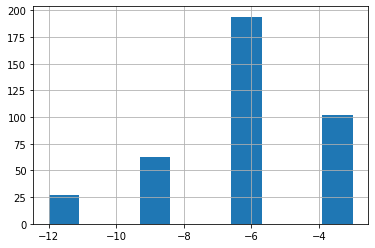

In [468]:
show_base_info('studytime_granular')
students.studytime_granular.hist()
students.studytime_granular.describe()

### higher 

In [469]:
show_base_info('higher')

,higher
yes,355
no,18


<class 'pandas.core.frame.DataFrame'>
Int64Index: 393 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   higher  373 non-null    object
dtypes: object(1)
memory usage: 6.1+ KB
Количество пустых значений: 20


Значения находятся в пределах ожидаемого диапазона. Выбросов не обнаружено, пропуски не требуют дополнительной обработки

### internet 

In [470]:
show_base_info('internet')

,internet
yes,303
no,56


<class 'pandas.core.frame.DataFrame'>
Int64Index: 393 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   internet  359 non-null    object
dtypes: object(1)
memory usage: 6.1+ KB
Количество пустых значений: 34


Значения находятся в пределах ожидаемого диапазона. Выбросов не обнаружено, пропуски не требуют дополнительной обработки

### romantic 

In [471]:
show_base_info('romantic')

,romantic
no,239
yes,123


<class 'pandas.core.frame.DataFrame'>
Int64Index: 393 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   romantic  362 non-null    object
dtypes: object(1)
memory usage: 6.1+ KB
Количество пустых значений: 31


Значения находятся в пределах ожидаемого диапазона. Выбросов не обнаружено, пропуски не требуют дополнительной обработки

### famrel 

In [472]:
show_base_info('famrel')

,famrel
4.0,182
5.0,97
3.0,62
2.0,17
1.0,7
-1.0,1


<class 'pandas.core.frame.DataFrame'>
Int64Index: 393 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   famrel  366 non-null    float64
dtypes: float64(1)
memory usage: 6.1 KB
Количество пустых значений: 27


Обнаружено 1 значение вне ожидаемого диапазона значений

In [473]:
# Исключаем все записи, выходящие за пределы диапазона [1, 5], но при этом оставляем пропуски чтобы не потерять потенциально
# существенные данные для определения корреляции параметров

students = students.loc[(students.famrel.between(1, 5)) | students.famrel.isnull()]

In [474]:
show_base_info('famrel')

,famrel
4.0,182
5.0,97
3.0,62
2.0,17
1.0,7


<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   famrel  365 non-null    float64
dtypes: float64(1)
memory usage: 6.1 KB
Количество пустых значений: 27


### freetime 

In [475]:
show_base_info('freetime')

,freetime
3.0,153
4.0,111
2.0,61
5.0,38
1.0,18


<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   freetime  381 non-null    float64
dtypes: float64(1)
memory usage: 6.1 KB
Количество пустых значений: 11


Значения находятся в пределах ожидаемого диапазона. Выбросов не обнаружено, пропуски не требуют дополнительной обработки

### goout 

In [476]:
show_base_info('goout')

,goout
3.0,127
2.0,99
4.0,84
5.0,51
1.0,23


<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   goout   384 non-null    float64
dtypes: float64(1)
memory usage: 6.1 KB
Количество пустых значений: 8


Значения находятся в пределах ожидаемого диапазона. Выбросов не обнаружено, пропуски не требуют дополнительной обработки

### health 

In [477]:
show_base_info('health')

,health
5.0,137
3.0,89
4.0,62
1.0,46
2.0,43


<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   health  377 non-null    float64
dtypes: float64(1)
memory usage: 6.1 KB
Количество пустых значений: 15


Значения находятся в пределах ожидаемого диапазона. Выбросов не обнаружено, пропуски не требуют дополнительной обработки

### absences 

In [478]:
show_base_info('absences')

,absences
0.0,111
2.0,60
4.0,52
6.0,31
8.0,21
10.0,17
12.0,12
14.0,11
3.0,8
16.0,6


<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   absences  380 non-null    float64
dtypes: float64(1)
memory usage: 6.1 KB
Количество пустых значений: 12


count    380.000000
mean       7.247368
std       23.550471
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max      385.000000
Name: absences, dtype: float64

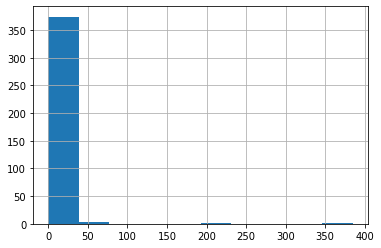

In [479]:
students.absences.hist()
students.absences.describe()

Очевидно, в выборке содержатся выбросы. Избавимся от них с помощью IQR

25-й перцентиль: 0.0, 75-й перцентиль: 8.0, IQR: 8.0,  Границы выбросов: [-12.0, 20.0].


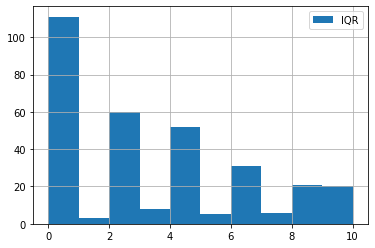

In [480]:
p25 = students.absences.quantile(.25)
p75 = students.absences.quantile(.75)
iqr = p75 - p25

print('25-й перцентиль: {},'.format(p25), '75-й перцентиль: {},'.format(p75), "IQR: {}, ".format(iqr), 
      "Границы выбросов: [{f}, {l}].".format(f=p25 - 1.5*iqr, l=p75 + 1.5*iqr))
 
students.absences.loc[students.absences.between(p25 - 1.5*iqr, p75 + 1.5*iqr)].hist(bins = 10, range = (0, 10), label = 'IQR')
 
plt.legend();

In [481]:
# Избавляемся от выбросов, сохранив при этом, пропуски
students = students.loc[(students.absences.between(p25 - 1.5*iqr, p75 + 1.5*iqr)) | students.absences.isnull()]

### score 

In [482]:
show_base_info('score')

,score
50.0,54
55.0,42
0.0,37
75.0,33
65.0,30
60.0,30
70.0,27
40.0,26
45.0,23
80.0,16


<class 'pandas.core.frame.DataFrame'>
Int64Index: 375 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   score   369 non-null    float64
dtypes: float64(1)
memory usage: 5.9 KB
Количество пустых значений: 6


count    369.000000
mean      52.276423
std       23.145206
min        0.000000
25%       40.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

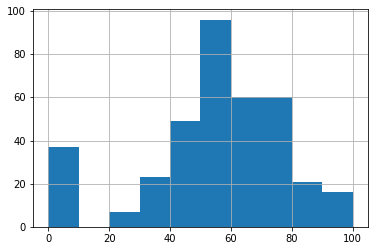

In [483]:
students.score.hist()
students.score.describe()

25-й перцентиль: 40.0, 75-й перцентиль: 70.0, IQR: 30.0,  Границы выбросов: [-5.0, 115.0].


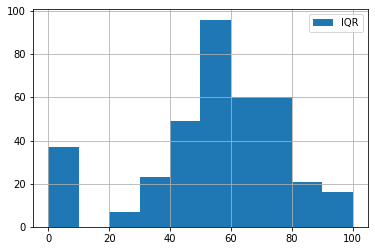

In [484]:
p25 = students.score.quantile(.25)
p75 = students.score.quantile(.75)
iqr = p75 - p25

print('25-й перцентиль: {},'.format(p25), '75-й перцентиль: {},'.format(p75), "IQR: {}, ".format(iqr), 
      "Границы выбросов: [{f}, {l}].".format(f=p25 - 1.5*iqr, l=p75 + 1.5*iqr))
 
students.score.loc[students.score.between(p25 - 1.5*iqr, p75 + 1.5*iqr)].hist(bins = 10, label = 'IQR')
 
plt.legend();

In [485]:
# Избавляемся от записей, которые выходят за границы выбросов и от пропусков, т.к. мы пытаемся проследить влияние
# всех остальных параметров именно на эту величину, а значит она не может быть null
students = students.loc[students.score.between(p25 - 1.5*iqr, p75 + 1.5*iqr)]

## Анализ корреляций

In [486]:
display(students.head(10))
students.info() 

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,studytime_granular,higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


<class 'pandas.core.frame.DataFrame'>
Int64Index: 369 entries, 0 to 394
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   school              369 non-null    object 
 1   sex                 369 non-null    object 
 2   age                 369 non-null    int64  
 3   address             354 non-null    object 
 4   famsize             344 non-null    object 
 5   Pstatus             331 non-null    object 
 6   Medu                366 non-null    float64
 7   Fedu                346 non-null    float64
 8   Mjob                352 non-null    object 
 9   Fjob                334 non-null    object 
 10  reason              352 non-null    object 
 11  guardian            339 non-null    object 
 12  traveltime          341 non-null    float64
 13  studytime           362 non-null    float64
 14  failures            350 non-null    float64
 15  schoolsup           360 non-null    object 
 16  famsup  

In [487]:
students.corr()

,age,Medu,Fedu,traveltime,studytime,failures,studytime_granular,famrel,freetime,goout,health,absences,score
age,1.000000,-0.174835,-0.155235,0.094904,0.003292,0.154802,-0.003292,0.039735,0.025873,0.115096,-0.043113,0.136080,-0.161105
Medu,-0.174835,1.000000,0.628468,-0.175606,0.101411,-0.258209,-0.101411,-0.007988,0.052709,0.058530,-0.041478,0.069401,0.221031
Fedu,-0.155235,0.628468,1.000000,-0.147876,0.015255,-0.282059,-0.015255,-0.016202,-0.000461,0.057721,0.013692,-0.012093,0.125475
traveltime,0.094904,-0.175606,-0.147876,1.000000,-0.106449,0.074369,0.106449,-0.043713,-0.008780,0.032971,-0.014402,-0.042899,-0.073252
studytime,0.003292,0.101411,0.015255,-0.106449,1.000000,-0.171597,-1.000000,0.027049,-0.135568,-0.036818,-0.090325,-0.061869,0.116838
failures,0.154802,-0.258209,-0.282059,0.074369,-0.171597,1.000000,0.171597,-0.014707,0.081346,0.081343,0.117668,0.040842,-0.348939
studytime_granular,-0.003292,-0.101411,-0.015255,0.106449,-1.000000,0.171597,1.000000,-0.027049,0.135568,0.036818,0.090325,0.061869,-0.116838
famrel,0.039735,-0.007988,-0.016202,-0.043713,0.027049,-0.014707,-0.027049,1.000000,0.162887,0.058237,0.099520,-0.084738,0.064207
freetime,0.025873,0.052709,-0.000461,-0.008780,-0.135568,0.081346,0.135568,0.162887,1.000000,0.274483,0.064925,0.099615,0.041901
goout,0.115096,0.058530,0.057721,0.032971,-0.036818,0.081343,0.036818,0.058237,0.274483,1.000000,0.004989,0.108844,-0.110853


Из данной матрицы корреляций можно видеть, что среди числовых значений нет в достаточной степени сильно коррелируемых значейний для того, чтобы исключить какое-либо поле. Среди наиболее значимых можно отметить корреляции **failures (-0.347363)** и **Medu (0.220594)**.
Негативная связь результата экзамена с количеством внеучебных неудач вполне объяснима на бытовом уровне (чем больше неудач, тем ниже оценка).
Позитивную связь результата экзамена с образованием отца так же можно попытаться объяснить с помощью гипотезы, что эти два параметра связаны опосредованно через финансовую составляющую семьи (чем лучше образование родителя тем выше достаток семьи, и следовательно больше возможностей для получения качественного образования)

## Анализ номинативных переменных

In [488]:
for col in ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 
            'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки sex
Найдены статистически значимые различия для колонки address
Найдены статистически значимые различия для колонки Mjob
Найдены статистически значимые различия для колонки paid
Найдены статистически значимые различия для колонки higher
Найдены статистически значимые различия для колонки romantic


С помощью теста Стьюдента выявлено 6 парамтров, которые имеют статистически значимое влияние на результаты экзамена. 

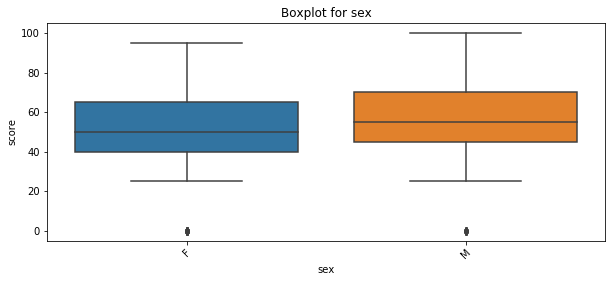

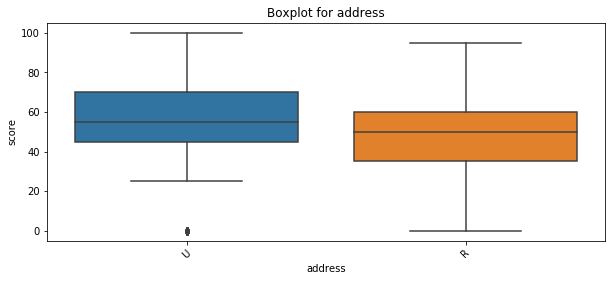

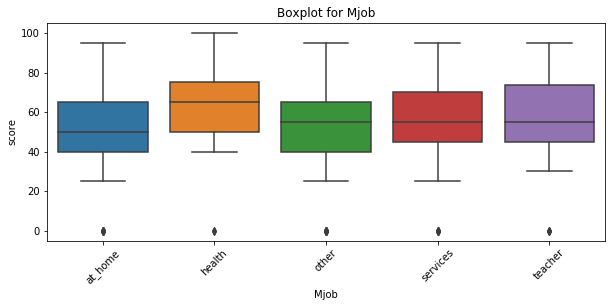

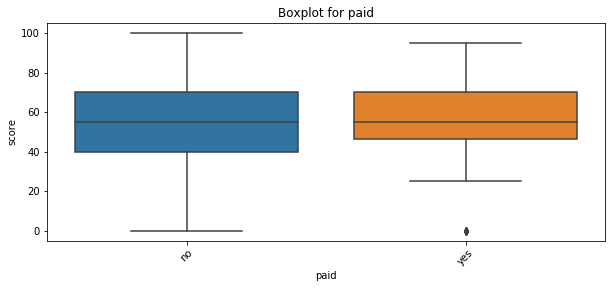

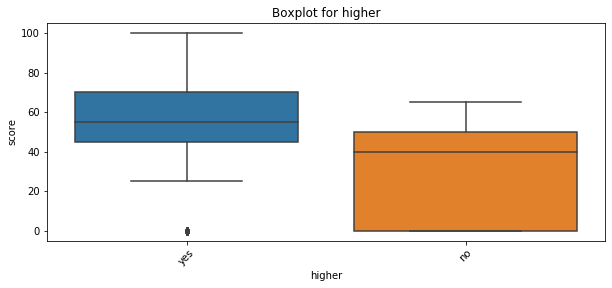

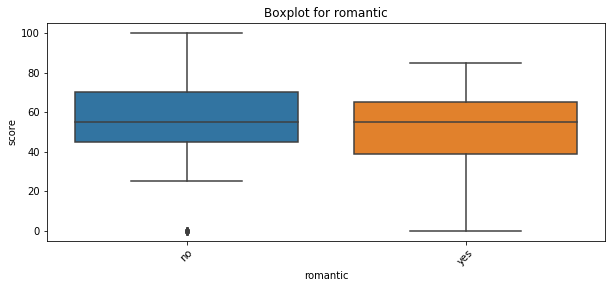

In [489]:
# Отображаем зависимости на графике
for col in ['sex', 'address', 'Mjob', 'paid', 'higher', 'romantic']:
    get_boxplot(col)

## Выводы

- Представленный датасет содержит данные хорошего качества. Присуствует незначительное количество выбросов, преобразования данных и их приведения к единому виду не потребовалось, т.к. большая часть номинативных переменных заполнены корректно. 
- Числовые переменные слабо коррелируют с прогнозируемым значением за исключением нескольких параметров: **failures**, **Medu** и **age**. Поскольку корреляция этих параметров с прогнозируемым значением далеко не 100%-ая, исключать их из дальнейшего анализа не следует.
- Среди номинативных параметров статистически значимыми согласно тесту Стьюдента оказались всего 6. Среди них: sex, address, Mjob, paid, higher, romantic. Простейшая интерпретация такого результата говорит о следующем: молодые люди в среднем получают более высокие оценки по математике, чем девушки (медиана оценок среди молодых людей выше); жители городов чаще получают высокий бал, чем за городом, однако медианное значение среди городских жителей не сильно превышает медиану среди сельских жителей. Дополнительные платные занятия повышают вероятность получить высокий балл (минимальное значение оценки среди тех, кто докупал занятия выше чем у тех, кто этого не делал), однако медианное значение практически совпадает. И естесственно, что молодые люди, стремящиеся к получению высшего образования, имеют гораздо более высокие баллы чем те, кто не имеет такой цели и очевидно, что романтические отношения снижают способности к математике. :)